In [1]:
#imports
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# read dataset for January
data = pd.read_csv('../data/data-01.csv')
# delete non-number columns
del data['store_and_fwd_flag']
del data['tpep_dropoff_datetime']
del data['tpep_pickup_datetime']

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Drop non-numbers
data = data.dropna()

In [4]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,1.0,1.2,1.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,1.0,1.2,1.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,1.0,0.6,1.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,1.0,0.8,1.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,1.0,0.0,1.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [6]:
# split 70%/30%
x_train, x_test = train_test_split(data, test_size=0.3)
y_train, y_test = x_train['tip_amount'], x_test['tip_amount']
# Drop column we're predicting from the dataset
del x_train['tip_amount']
del x_test['tip_amount']

In [7]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

x_test=np.array(x_test)
y_test=np.array(y_test)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4437696, 14)
(1901871, 14)
(4437696,)
(1901871,)


In [9]:
clf_ = SGDRegressor()
# Run the regression
clf_.fit(x_train, y_train)

SGDRegressor()

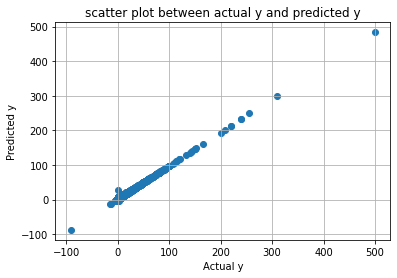

Mean Squared Error : 0.07682138230787777
Mean Absolute Error : 0.16526712565397472


In [10]:
# Plot data
plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

In [11]:
# Why so good?